In [ ]:
import numpy as np

np.version.full_version

'2.0.2'

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist

(train_images, y_train), (x_test, y_test) = mnist.load_data()
train_images, x_test = train_images / 255.0, x_test /255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
img = train_images[0]
img.shape

(28, 28)

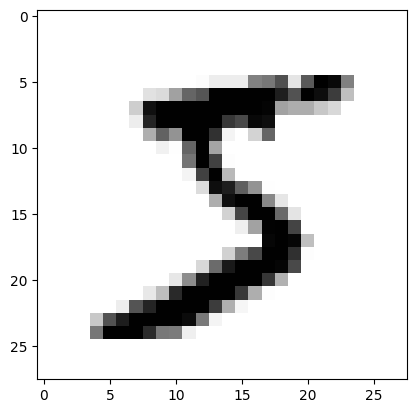

In [5]:
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images[:1].shape

(1, 28, 28)

In [10]:
predictions = model(train_images[:1]).numpy()
predictions

array([[-0.08530495,  0.32638198, -0.08272354, -0.3479375 ,  0.09816583,
        -0.36073667,  0.09881009, -0.3232293 ,  0.04005489, -0.4216457 ]],
      dtype=float32)

In [11]:
p = tf.nn.softmax(predictions).numpy()
p

array([[0.09920686, 0.14973906, 0.09946328, 0.0762925 , 0.11918513,
        0.07532225, 0.11926194, 0.07820103, 0.11245657, 0.07087136]],
      dtype=float32)

In [12]:
p.sum()

np.float32(1.0)

In [13]:
p.argmax()

np.int64(1)

In [14]:
y_train[0]

np.uint8(5)

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.5859797)

In [17]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [18]:
model.fit(train_images, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8555 - loss: 0.4847
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9553 - loss: 0.1537
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.1078
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9711 - loss: 0.0922
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9759 - loss: 0.0739
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9788 - loss: 0.0639
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0580
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0528
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0468
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0441


In [19]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9803 - loss: 0.0656


[0.06561271101236343, 0.9803000092506409]

In [20]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [21]:
result = probability_model(x_test[:5])
result = result.numpy().argmax(axis=1)
print(y_test[:5])

[7 2 1 0 4]


In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)